In [1]:
# import necessary libraries to start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sk_modelcurves.learning_curve import draw_learning_curve

<table>
	<tbody>
		<tr>
			<td><b>Column Name</b></td>
			<td><b>Description</b></td>
		</tr>
		<tr>
			<td>act_percent_took_exam</td>
			<td>Percentage of students who took the ACT exam (note: scores are not included due to lack of data &lt;50%)</td>
		</tr>
                		<tr>
			<td>all_crime</td>
			<td>Sum of major_crimes and violation_offenses</td>
		</tr>
        		<tr>
			<td>ap_exams_percent_scoring_3plus</td>
			<td>Percentage of students who scored over 3 on the AP exam (passing grade)</td>
		</tr>
        		<tr>
			<td>arts_percent</td>
			<td>Percentage of students who received an arts endorsement on their diploma</td>
		</tr>
		<tr>
			<td>asian_percent</td>
			<td>Percent of Asian students within school&#39;s population</td>
		</tr>
        		<tr>
			<td>avg_home_value_sqft</td>
			<td>Average price per square footage (condos and co-ops) in USD</td>
		</tr>
		<tr>
			<td>black_percent</td>
			<td>Percent of black students within school&#39;s population</td>
		</tr>
		<tr>
			<td>college_career_readiness_index</td>
			<td>
			<p>Percentage of students who have attained any of the following:</p>

			<p>- Scored 65+ on Algebra II or Math 2, Chemistry, or Physics&nbsp;Regents</p>

			<p>- Scored 3+ on any AP exam or 4+ on any IB exam</p>

			<p>- Earned a grade of &#39;C&#39; or higher on any college-credit bearing course</p>

			<p>- Passed any course certified by the DOE as being &quot;college and career ready&quot;</p>

			<p>- Earned a diploma with a CTE (&#39;Career and Technical Education&#39;) endorsement</p>

			<p>- Earned a diploma with an Arts endorsement</p>

			<p>- Passed an industry-recognized technical assesment</p>
			</td>
		</tr>
		<tr>
			<td>college_nys_private</td>
			<td>Enrollment rate into New York State private universities within six months of graduation</td>
		</tr>
		<tr>
			<td>college_nys_public</td>
			<td>Enrollment rate into New York State public universities within six months of graduation</td>
		</tr>
		<tr>
			<td>college_out_of_state</td>
			<td>Enrollment rate into out of state universities within six months of graduation</td>
		</tr>
		<tr>
			<td>college_readiness_index</td>
			<td>Percentage of students who meet CUNY&#39;s standards of readiness in math (score of 80+ on a math Regents, 480+ on SAT math, 20+ on ACT math, 40 on a CUNY assesment test math 2, or pass granted by the NY State Performance Standards Consortium) or English (score of 75+ on English Regents, 480+ on SAT verbal, 20+ on ACT English, or 70+ on reading and 56+ on writing on the CUNY assesment test)</td>
		</tr>
        		<tr>
			<td>cte_percent</td>
			<td>Percentage of students who graduate with a career technology endorsement on their diploma</td>
		</tr>
		<tr>
			<td>cuny_2yr</td>
			<td>Enrollment rate into 2-year CUNY (City University of New York) schools within six months of graduation</td>
		</tr>
		<tr>
			<td>cuny_4yr</td>
			<td>Enrollment rate into 4-year CUNY (City University of New York) schools within six months of graduation</td>
		</tr>
		<tr>
			<td>disability_percent</td>
			<td>Percent of students with disabilities within school&#39;s population</td>
		</tr>
        		<tr>
			<td>district_admin_code</td>
			<td>Administrative Department of Education district code (special identifier for special needs schools)</td>
		</tr>
                       		<tr>
			<td>dropouts_percent</td>
			<td>Percent of students from cohort who dropped out</td>
		</tr>
		<tr>
			<td>ell_percent</td>
			<td>Percent of English language learner students within school&#39;s population<br />
			(English is not their native language)</td>
		</tr>

		<tr>
			<td>enrollment</td>
			<td>Total student enrollment for school</td>
		</tr>
		<tr>
			<td>female_percent</td>
			<td>Percent of female students within school&#39;s population</td>
		</tr>
		<tr>
			<td>grade8_english</td>
			<td>Average Grade 8 English Proficiency (as determined by state exams)</td>
		</tr>
		<tr>
			<td>grade8_math</td>
			<td>Average Grade 8 Math Proficiency (as determined by state exams)</td>
		</tr>
        		<tr>
			<td>grade8_proficiency</td>
			<td>Sum of Average Grade 8 Math and Average Grade 8 English (as determined by state exams)</td>
		</tr>
		<tr>
			<td>graduation_rate</td>
			<td>Rate of students who graduated high school within four years</td>
		</tr>
        		<tr>
			<td>label</td>
			<td>1=School graduates students at a rate over the average NYC public high school graduation rate (within one standard deviation)
            <br>0=School graduates students at a rate under the average public high school graduation rate (within one standard deviation)</td>
		</tr>
		<tr>
			<td>hispanic_percent</td>
			<td>Percent of hispanic students within school&#39;s population</td>
		</tr>
        		<tr>
			<td>major_crimes</td>
			<td>Aggregate of major crimes in a school's precinct (includes murder, rape, robbery, grand theft, and grand theft auto)</td>
		</tr>
		<tr>
			<td>male_percent</td>
			<td>Percent of male students within school&#39;s population</td>
		</tr>
        		<tr>
			<td>population_diversity</td>
			<td>Diversity feature created by summing the squares of white_percent, black_percent, hispanic_percent, and asian_percent; note that a higher number indicate a more homogenous population, while a smaller number represents a more diverse student body</td>
		</tr>
		<tr>
			<td>post-secondary_enroll_rate&nbsp;</td>
			<td>Rate of students who enrolled in post-secondary education within six months of graduation</td>
		</tr>
		<tr>
			<td>poverty_percent</td>
			<td>Percent of students within school&#39;s population who live in poverty (as determined by free lunch index, temporary housing, ratio of subsidiaries given)</td>
		</tr>
        		<tr>
			<td>principal_year_exp</td>
			<td>Years of experience current principal has had at school</td>
		</tr>

        		<tr>
			<td>regents_algebra</td>
			<td>Average score on integrated algebra Regents exam (passing score of 65 on any math exam is required for graduation)</td>
		</tr>

 
		<tr>
			<td>regents_english</td>
			<td>Average score on English Regents exam&nbsp;(passing score of 65 is required for graduation)</td>
		</tr>

        		<tr>
			<td>regents_history_global</td>
			<td>Average score on global history Regents exam (passing score of 65 on any history exam is required for graduation)</td>
		</tr>


        <tr>
        			<td>regents_living_environ</td>
			<td>Average score on science living environment Regents exams (passing score of 65 on any science exam is required for graduation)</td>
		</tr>
        		<tr>
			<td>regents_overall</td>
			<td>Sum of all average reported Regents scores from each school (I created this)</td>
		</tr>
  
		<tr>
			<td>sat_math</td>
			<td>Average score on SAT Math Exam (out of 800)</td>
		</tr>
		<tr>
			<td>sat_percent_took_exam</td>
			<td>Percentage of students who took the SAT exam</td>
		</tr>
		<tr>
			<td>sat_reading</td>
			<td>Average score on SAT Math Exam (out of 800)</td>
		</tr>
		<tr>
			<td>sat_score_overall</td>
			<td>Average score on SAT Math Exam (out of 2400)</td>
		</tr>
		<tr>
			<td>sat_writing</td>
			<td>Average score on SAT Math Exam (out of 800)</td>
		</tr>

        		<tr>
			<td>school_day_length</td>
			<td>Length of schoolday (in minutes). Created using start and end times.</td>
		</tr>
        	<tr>
			<td>school_desc</td>
			<td>Short description of school type</td>
		</tr>
        	<tr>
			<td>school_environment_survey</td>
			<td>Survey responses in percentage positive combined from students, teachers, and parents regarding school culture/environment</td>
		</tr>
                	<tr>
			<td>school_name</td>
			<td>Name of schools</td>
		</tr>
        		<tr>
			<td>self-contained_percent</td>
			<td>Percentage of students in a self-contained learning environment; typically, for special needs students</td>
		</tr>
		<tr>
			<td>student_attendance_rate</td>
			<td>Rate of student attendance throughout the year</td>
		</tr>
		<tr>
			<td>teacher_attendance</td>
			<td>Rate of teacher attendane throughout the year</td>
		</tr>
        		<tr>
			<td>violation_offenses</td>
			<td>Aggregate of violation offenses (includes harrassment complaints) within a school's precinct)</td>
		</tr>
		<tr>
			<td>vocational_prog</td>
			<td>Enrollment rate into vocational programs within six months of graduation</td>
		</tr>
		<tr>
			<td>white_percent</td>
			<td>Percent of white students within school&#39;s population</td>
		</tr>
		<tr>
			<td>zip_code</td>
			<td>School&#39;s zip code</td>
		</tr>
	</tbody>
</table>




In [3]:
# import data (exported from 2_data_cleaning_eda.ipynb)
all_data = pd.read_csv('nyc_high_schools_complete_clean.csv', index_col=0)
all_data.head()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,district_admin_code,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,...,dropouts_percent,major_crimes,violation_offenses,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency,all_crime,label
DBN,,,,,,,,,,,,,,,,,,,,,
1501M292,0.376471,0.623529,0.866667,1321.166667,1,2.18,2.06,64,66,53,...,0.095890,732,506,420,1197,238,0.414436,4.24,1238,0
1501M448,0.378289,0.621711,0.891447,1321.166667,1,2.27,2.37,64,69,67,...,0.097561,732,506,420,1144,268,0.326466,4.64,1238,0
1501M450,0.469970,0.530030,0.735736,1324.500000,1,2.66,2.63,65,75,64,...,0.034091,1331,584,420,1327,271,0.418853,5.29,1915,1
1501M509,0.567493,0.432507,0.845730,1321.166667,1,2.28,2.09,61,69,63,...,0.176471,732,506,450,1245,257,0.430484,4.37,1238,0
1501M539,0.515274,0.484726,0.273199,1321.166667,1,3.50,3.53,80,91,87,...,0.008197,732,506,465,1859,346,0.289293,7.03,1238,1


In [4]:
list(all_data)

['female_percent',
 'male_percent',
 'poverty_percent',
 'avg_home_value_sqft',
 'district_admin_code',
 'grade8_english',
 'grade8_math',
 'regents_algebra',
 'regents_english',
 'regents_history_global',
 'regents_living_environ',
 'sat_reading',
 'sat_math',
 'sat_writing',
 'college_readiness_index',
 'cuny_2yr',
 'cuny_4yr',
 'college_career_readiness_index',
 'enrollment',
 'graduation_rate',
 'college_nys_private',
 'college_nys_public',
 'college_out_of_state',
 'asian_percent',
 'black_percent',
 'ell_percent',
 'hispanic_percent',
 'self-contained_percent',
 'disability_percent',
 'white_percent',
 'cte_percent',
 'arts_percent',
 'ap_exams_percent_scoring_3plus',
 'act_percent_took_exam',
 'sat_percent_took_exam',
 'post-secondary_enroll_rate',
 'student_attendance_rate',
 'school_environment_survey',
 'teacher_attendance',
 'principal_year_exp',
 'zip_code',
 'dropouts_percent',
 'major_crimes',
 'violation_offenses',
 'school_day_length',
 'sat_score_overall',
 'regents_sc

In [5]:
data = all_data.copy()

In [6]:
# Need to drop more features for fair evaluation:
# graduation rates, college readiness index (since they are all tied to the model used to calculate the label)
data = data.drop(['college_readiness_index', 'graduation_rate', 'college_career_readiness_index'], axis=1)

In [7]:
# also drop forward-facing features
data = data.drop(['cuny_2yr', 'cuny_4yr', 'college_nys_private', 'college_nys_public',
                 'college_out_of_state', 'post-secondary_enroll_rate'], axis=1)

In [8]:
# Really should drop any exam scores used to calculate the college readiness index (SAT scores, Regents scores, APs)
# Nervous about results, so will create a separate dataframe for comparison
data_noexam = data.drop(['regents_algebra', 'regents_english', 'regents_history_global',
                        'regents_living_environ', 'sat_math', 'sat_reading',
                        'sat_writing', 'ap_exams_percent_scoring_3plus', 'sat_score_overall', 'regents_score_overall'], axis=1)

In [9]:
# create a dataset with dummy categoricals for only zip
data_zip = data_noexam.drop('district_admin_code', axis=1)

In [10]:
data_zip['zip_code'] = data_zip['zip_code'].astype(int)

In [11]:
data_zip['zip_code'] = data_zip['zip_code'].astype('category')

In [12]:
zip_code_dummy = pd.get_dummies(data_zip['zip_code'])

In [13]:
data_zip = pd.concat([data_zip, zip_code_dummy], axis=1)

In [14]:
data_zip.head()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,grade8_english,grade8_math,enrollment,asian_percent,black_percent,ell_percent,...,11419,11420,11423,11426,11427,11432,11433,11434,11691,11694
DBN,,,,,,,,,,,,,,,,,,,,,
1501M292,0.376471,0.623529,0.866667,1321.166667,2.18,2.06,255,0.132,0.244,0.127,...,0,0,0,0,0,0,0,0,0,0
1501M448,0.378289,0.621711,0.891447,1321.166667,2.27,2.37,304,0.299,0.250,0.194,...,0,0,0,0,0,0,0,0,0,0
1501M450,0.469970,0.530030,0.735736,1324.500000,2.66,2.63,666,0.094,0.221,0.018,...,0,0,0,0,0,0,0,0,0,0
1501M509,0.567493,0.432507,0.845730,1321.166667,2.28,2.09,363,0.058,0.399,0.091,...,0,0,0,0,0,0,0,0,0,0
1501M539,0.515274,0.484726,0.273199,1321.166667,3.50,3.53,1735,0.385,0.133,0.002,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# create a dataset with dummy categoricals for only administrative district
data_admin = data_noexam.drop('zip_code', axis=1)

In [16]:
dac_dummy = pd.get_dummies(data_admin['district_admin_code'])

In [17]:
data_admin = pd.concat([data_admin, dac_dummy], axis=1)

In [18]:
# make sure that the non-categorical dataframes don't have them
data_noexam = data_noexam.drop(['zip_code', 'district_admin_code'], axis=1)
data = data.drop(['zip_code', 'district_admin_code'], axis=1)

In [19]:
# create a dataset with only race/socioeconomic features
data_rses = pd.DataFrame(data=[data['female_percent'], data['male_percent'], 
                              data['poverty_percent'], data['avg_home_value_sqft'],
                              data['asian_percent'], data['black_percent'],
                              data['ell_percent'], data['hispanic_percent'],
                              data['self-contained_percent'], data['disability_percent'],
                              data['white_percent'], data['population_diversity'],
                              data['label']])

In [21]:
data_rses = data_rses.transpose()
data_rses.head()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,population_diversity,label
DBN,,,,,,,,,,,,,
1501M292,0.376471,0.623529,0.866667,1321.166667,0.132,0.244,0.127,0.566,0.015,0.298,0.039,0.414436,0
1501M448,0.378289,0.621711,0.891447,1321.166667,0.299,0.250,0.194,0.411,0.003,0.220,0.033,0.326466,0
1501M450,0.469970,0.530030,0.735736,1324.500000,0.094,0.221,0.018,0.579,0.000,0.234,0.083,0.418853,1
1501M509,0.567493,0.432507,0.845730,1321.166667,0.058,0.399,0.091,0.512,0.146,0.284,0.025,0.430484,0
1501M539,0.515274,0.484726,0.273199,1321.166667,0.385,0.133,0.002,0.180,0.000,0.043,0.286,0.289293,1


#### Data Setup

In [22]:
# Assign data to X and y (3x for each dataset I wish to test)
# note that data has exams that feed into cri and hopefully is just for comparison
y1 = data_noexam['label']
y2 = data_admin['label']
y3 = data_zip['label']
y4 = data_rses['label']

X1 = data_noexam.drop('label', axis=1)
X2 = data_admin.drop('label', axis=1)
X3 = data_zip.drop('label', axis=1)
X4 = data_rses.drop('label', axis=1)

In [23]:
len(X1.columns)

29

In [24]:
len(X2.columns)

62

In [25]:
len(X3.columns)

150

In [26]:
len(X4.columns)

12

In [27]:
# break up the data into test and training sets:
from sklearn.cross_validation import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=1)

In [28]:
# 20% test / 80% train / 10 cross validation iterations 
from sklearn.cross_validation import ShuffleSplit
cv1 = ShuffleSplit(X_train1.shape[0], n_iter=10, test_size=0.2, random_state=0)
cv2 = ShuffleSplit(X_train2.shape[0], n_iter=10, test_size=0.2, random_state=0)
cv3 = ShuffleSplit(X_train3.shape[0], n_iter=10, test_size=0.2, random_state=0)
cv4 = ShuffleSplit(X_train4.shape[0], n_iter=10, test_size=0.2, random_state=0)

In [29]:
# standardization for models that use euclidian distances
from sklearn.preprocessing import StandardScaler
scale1 = StandardScaler()
scale2 = StandardScaler()
scale3 = StandardScaler()
scale4 = StandardScaler()

# transform training features
X_train_std1 = scale1.fit_transform(X_train1)
# transform the testing features in the same way
X_test_std1 = scale1.transform(X_test1)

X_train_std2 = scale2.fit_transform(X_train2)
X_test_std2 = scale2.transform(X_test2)

X_train_std3 = scale3.fit_transform(X_train3)
X_test_std3 = scale3.transform(X_test3)

X_train_std4 = scale4.fit_transform(X_train4)
X_test_std4 = scale4.transform(X_test4)

#### MINIMUM BENCHMARK

In [30]:
from sklearn.dummy import DummyClassifier

In [31]:
from sklearn.cross_validation import cross_val_score

# a dummy classifier that always guesses the most-frequent (schools graduating college-ready students under the nyc avg grad rate)
# data
dc1 = DummyClassifier(strategy='stratified', random_state=1)
dc1.fit(X_train_std1, y_train1)

DummyClassifier(constant=None, random_state=1, strategy='stratified')

In [32]:
%timeit dc1.fit(X_train_std1, y_train1)

1000 loops, best of 3: 223 µs per loop


In [33]:
from sklearn.metrics import classification_report
print classification_report(dc1.predict(X_test_std1), y_test1)

             precision    recall  f1-score   support

          0       0.87      0.90      0.89       167
          1       0.27      0.21      0.24        28

avg / total       0.79      0.81      0.80       195



In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(dc1.predict(X_test_std1), y_test1)

0.80512820512820515

In [35]:
# data_noexam
dc2 = DummyClassifier(strategy='stratified', random_state=1)
dc2.fit(X_train_std2, y_train2)

DummyClassifier(constant=None, random_state=1, strategy='stratified')

In [36]:
%timeit dc2.fit(X_train_std2, y_train2)

1000 loops, best of 3: 236 µs per loop


In [37]:
print classification_report(dc2.predict(X_test_std2), y_test2)

             precision    recall  f1-score   support

          0       0.87      0.90      0.89       167
          1       0.27      0.21      0.24        28

avg / total       0.79      0.81      0.80       195



In [38]:
accuracy_score(dc2.predict(X_test_std2), y_test2)

0.80512820512820515

In [39]:
# data_admin
dc3 = DummyClassifier(strategy='stratified', random_state=1)
dc3.fit(X_train_std3, y_train3)

DummyClassifier(constant=None, random_state=1, strategy='stratified')

In [40]:
%timeit dc3.fit(X_train_std3, y_train3)

1000 loops, best of 3: 221 µs per loop


In [41]:
print classification_report(dc3.predict(X_test_std3), y_test3)

             precision    recall  f1-score   support

          0       0.87      0.90      0.89       167
          1       0.27      0.21      0.24        28

avg / total       0.79      0.81      0.80       195



In [42]:
accuracy_score(dc3.predict(X_test_std3), y_test3)

0.80512820512820515

In [43]:
# data_zip
dc4 = DummyClassifier(strategy='stratified', random_state=1)
dc4.fit(X_train_std4, y_train4)

DummyClassifier(constant=None, random_state=1, strategy='stratified')

In [44]:
%timeit dc4.fit(X_train_std4, y_train4)

1000 loops, best of 3: 241 µs per loop


In [45]:
print classification_report(dc4.predict(X_test_std4), y_test4)

             precision    recall  f1-score   support

        0.0       0.87      0.90      0.89       167
        1.0       0.27      0.21      0.24        28

avg / total       0.79      0.81      0.80       195



In [46]:
accuracy_score(dc4.predict(X_test_std4), y_test4)

0.80512820512820515

#### RANDOM FOREST

In [47]:
# import and create random forest
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()

In [48]:
# find best params - first for data_noexam
from sklearn.grid_search import GridSearchCV
parameters = {'n_estimators': range(1, 201, 5)}
clfrf1 = GridSearchCV(rfmodel, parameters, cv=cv1)

In [49]:
# this is for data_noexam
clfrf1.fit(X_train1, y_train1)
clfrf1.best_params_

{'n_estimators': 36}

In [50]:
# this is for data_admin
clfrf2 = GridSearchCV(rfmodel, parameters, cv=cv2)
clfrf2.fit(X_train2, y_train2)
clfrf2.best_params_

{'n_estimators': 61}

In [51]:
# this is for data_zip
clfrf3 = GridSearchCV(rfmodel, parameters, cv=cv3)
clfrf3.fit(X_train3, y_train3)
clfrf3.best_params_

{'n_estimators': 71}

In [52]:
# this is for data_rses
clfrf4 = GridSearchCV(rfmodel, parameters, cv=cv4)
clfrf4.fit(X_train4, y_train4)
clfrf4.best_params_

{'n_estimators': 131}

In [53]:
# top cv score for data_noexam
clfrf1.best_score_

0.9538461538461539

In [54]:
# top cv score for data_admin
clfrf2.best_score_

0.9538461538461539

In [55]:
# top cv score for data_zip
clfrf3.best_score_

0.9538461538461539

In [56]:
# top cv score for data_rses
clfrf4.best_score_

0.92884615384615388

In [57]:
best_rf1 = clfrf1.best_estimator_

In [58]:
best_rf2 = clfrf2.best_estimator_

In [59]:
best_rf3 = clfrf3.best_estimator_

In [60]:
best_rf4 = clfrf4.best_estimator_

In [61]:
# Evaluate the Random Forest model using cross-validation for data_noexam
from sklearn.cross_validation import cross_val_score

scores1 = cross_val_score(rfmodel, X_train1, y_train1, scoring='f1')
print('CV accuracy {}, Average accuracy {}'.format(scores1, scores1.mean()))

CV accuracy [ 0.75409836  0.88        0.78787879], Average accuracy 0.807325716178


In [62]:
#^ for data_admin
scores2 = cross_val_score(rfmodel, X_train2, y_train2, scoring='f1')
print('CV accuracy {}, Average accuracy {}'.format(scores2, scores2.mean()))

CV accuracy [ 0.72413793  0.85714286  0.76923077], Average accuracy 0.783503852469


In [63]:
#^ for data_zip
scores3 = cross_val_score(rfmodel, X_train3, y_train3, scoring='f1')
print('CV accuracy {}, Average accuracy {}'.format(scores3, scores3.mean()))

CV accuracy [ 0.65384615  0.84507042  0.81355932], Average accuracy 0.770825299472


In [64]:
#^ for data_rses
scores4 = cross_val_score(rfmodel, X_train4, y_train4, scoring='f1')
print('CV accuracy {}, Average accuracy {}'.format(scores4, scores4.mean()))

CV accuracy [ 0.60377358  0.64705882  0.73015873], Average accuracy 0.660330379531


In [65]:
# check accuracy with test set - data_noexam
best_rf1.score(X_test1, y_test1)

0.96923076923076923

In [66]:
# Precision / Recall / F1
from sklearn.metrics import precision_recall_fscore_support

predrf1 = clfrf1.predict(X_test1)
precision_recall_fscore_support(predrf1, y_test1, average='binary') 

(0.81818181818181823, 0.90000000000000002, 0.85714285714285721, None)

In [67]:
# check accuracy with test set - data_admin
best_rf2.score(X_test2, y_test2)

0.96410256410256412

In [68]:
# Precision / Recall / F1

predrf2 = clfrf2.predict(X_test2)
precision_recall_fscore_support(predrf2, y_test2, average='binary') 

(0.81818181818181823, 0.8571428571428571, 0.83720930232558144, None)

In [69]:
# check accuracy with test set - data_zip
best_rf3.score(X_test3, y_test3)

0.96410256410256412

In [70]:
# Precision / Recall / F1

predrf3 = clfrf3.predict(X_test3)
precision_recall_fscore_support(predrf3, y_test3, average='binary') 

(0.81818181818181823, 0.8571428571428571, 0.83720930232558144, None)

In [71]:
# check accuracy with test set - data_rses
best_rf4.score(X_test4, y_test4)

0.93846153846153846

In [72]:
# Precision / Recall / F1

predrf4 = clfrf4.predict(X_test4)
precision_recall_fscore_support(predrf4, y_test4, average='binary') 

(0.63636363636363635, 0.77777777777777779, 0.70000000000000007, None)

In [73]:
# timing - data_noexam
%timeit best_rf1.predict(X_test1)

100 loops, best of 3: 4.84 ms per loop


In [74]:
# timing - data_admin
%timeit best_rf2.predict(X_test2)

100 loops, best of 3: 7.84 ms per loop


In [75]:
# timing - data_zip
%timeit best_rf3.predict(X_test3)

100 loops, best of 3: 12.3 ms per loop


In [76]:
# timing - data_rses
%timeit best_rf4.predict(X_test4)

10 loops, best of 3: 15.5 ms per loop


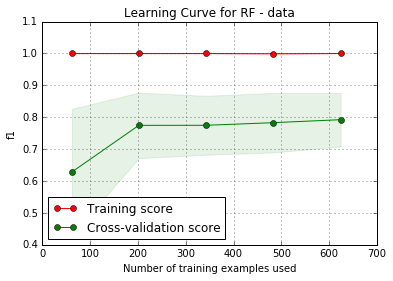

In [77]:
draw_learning_curve(best_rf2, X_train1, y_train1, estimator_titles=['Learning Curve for RF - data'], 
                    cv=cv2, scoring='f1')
plt.title('Learning Curve for RF - data');

/Users/hopper/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


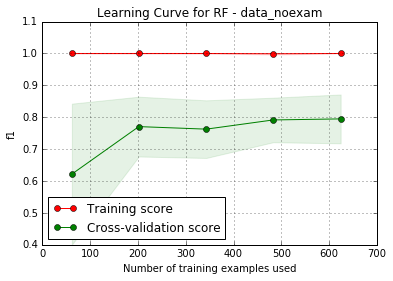

In [78]:
draw_learning_curve(best_rf2, X_train2, y_train2, estimator_titles=['Learning Curve for RF - data_noexam'], 
                    cv=cv2, scoring='f1')
plt.title('Learning Curve for RF - data_noexam');

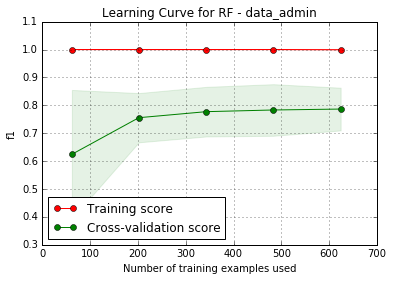

In [79]:
draw_learning_curve(best_rf3, X_train3, y_train3, estimator_titles=['Learning Curve for RF - data_admin'], 
                    cv=cv2, scoring='f1')
plt.title('Learning Curve for RF - data_admin');

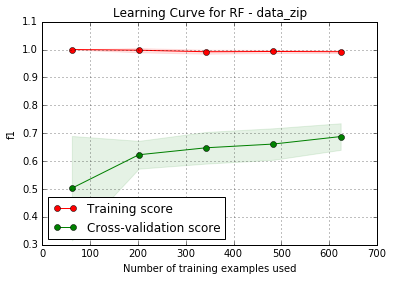

In [80]:
draw_learning_curve(best_rf4, X_train4, y_train4, estimator_titles=['Learning Curve for RF - data_zip'], 
                    cv=cv2, scoring='f1')
plt.title('Learning Curve for RF - data_zip');

In [81]:
# Use RF to find most important features - data (will likely be test-heavy)
features1 = X1.columns
feature_importances1 = best_rf1.feature_importances_
features_df1 = pd.DataFrame({'Features': features1, 'Importance Score': feature_importances1})
features_df1.sort_values('Importance Score', inplace=True, ascending=False)

features_df1.head(20)

,Features,Importance Score
5,grade8_math,0.165306
27,grade8_proficiency,0.149042
22,dropouts_percent,0.130687
4,grade8_english,0.120277
17,sat_percent_took_exam,0.054035
18,student_attendance_rate,0.048658
16,act_percent_took_exam,0.044308
7,asian_percent,0.031790
12,disability_percent,0.030344
13,white_percent,0.022283


In [82]:
# Use RF to find most important features - data_noexam (will hopefully find interesting factors here)
features2 = X2.columns
feature_importances2 = best_rf2.feature_importances_
features_df2 = pd.DataFrame({'Features': features2, 'Importance Score': feature_importances2})
features_df2.sort_values('Importance Score', inplace=True, ascending=False)

features_df2.head(20)

,Features,Importance Score
6,grade8_math,0.154821
28,grade8_proficiency,0.131859
5,grade8_english,0.086804
23,dropouts_percent,0.081912
18,sat_percent_took_exam,0.066384
19,student_attendance_rate,0.058118
10,ell_percent,0.049662
13,disability_percent,0.045814
8,asian_percent,0.037861
17,act_percent_took_exam,0.035713


In [83]:
# Use RF to find most important features - data_admin
features3 = X3.columns
feature_importances3 = best_rf3.feature_importances_
features_df3 = pd.DataFrame({'Features': features3, 'Importance Score': feature_importances3})
features_df3.sort_values('Importance Score', inplace=True, ascending=False)

features_df3.head(20)

,Features,Importance Score
28,grade8_proficiency,0.130036
4,grade8_english,0.109413
17,sat_percent_took_exam,0.105040
5,grade8_math,0.080432
23,dropouts_percent,0.062927
18,student_attendance_rate,0.060887
16,act_percent_took_exam,0.056290
9,ell_percent,0.035052
2,poverty_percent,0.034233
13,white_percent,0.028834


In [84]:
# Use RF to find most important features - data_zip
features4 = X4.columns
feature_importances4 = best_rf4.feature_importances_
features_df4 = pd.DataFrame({'Features': features4, 'Importance Score': feature_importances4})
features_df4.sort_values('Importance Score', inplace=True, ascending=False)

features_df4.head(20)

,Features,Importance Score
6,ell_percent,0.176850
4,asian_percent,0.149522
9,disability_percent,0.133236
2,poverty_percent,0.110065
10,white_percent,0.088712
8,self-contained_percent,0.055668
7,hispanic_percent,0.054882
5,black_percent,0.054255
11,population_diversity,0.051276
1,male_percent,0.043400


#### LOGISTIC REGRESSION

In [85]:
# import and create logistic regresstion
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [86]:
# tune params for data_noexam
parameterslr = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight':['auto', None], 'penalty': ['l1', 'l2']} 
clflr1 = GridSearchCV(logreg, parameterslr, cv=cv1)
clflr1.fit(X_train_std1, y_train1)

GridSearchCV(cv=ShuffleSplit(780, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': ['auto', None]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [87]:
# tune params via gridsearch --> for data_rses
parameterslr = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight':['auto', None], 'penalty': ['l1', 'l2']} 
clflr4 = GridSearchCV(logreg, parameterslr, cv=cv4)
clflr4.fit(X_train_std4, y_train4)

GridSearchCV(cv=ShuffleSplit(780, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': ['auto', None]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [88]:
# best params for data_noexam
clflr1.best_params_

{'C': 2020.2020299999999, 'class_weight': None, 'penalty': 'l1'}

In [89]:
# best params for data_rses
clflr4.best_params_

{'C': 1010.1010199999999, 'class_weight': None, 'penalty': 'l1'}

In [90]:
clflr1.best_score_

0.94294871794871793

In [91]:
clflr4.best_score_

0.93141025641025643

In [92]:
best_lr1 = clflr1.best_estimator_

In [93]:
best_lr4 = clflr4.best_estimator_

In [94]:
# Evaluate the LR model using cross-validation (for data_noexam)
from sklearn.cross_validation import cross_val_score

scoreslr1 = cross_val_score(logreg, X_train_std1, y_train1, scoring='f1')
print('CV accuracy {}, Average accuracy {}'.format(scoreslr1, scoreslr1.mean()))

CV accuracy [ 0.77966102  0.85714286  0.86567164], Average accuracy 0.834158505294


In [95]:
# Evaluate the LR model using cross-validation (for data_rses)

scoreslr4 = cross_val_score(logreg, X_train_std4, y_train4, scoring='f1')
print('CV accuracy {}, Average accuracy {}'.format(scoreslr4, scoreslr4.mean()))

CV accuracy [ 0.71428571  0.75757576  0.72131148], Average accuracy 0.73105764909


In [96]:
# check accuracy with test set - data_noexam
best_lr1.score(X_test_std1, y_test1)

0.96410256410256412

In [97]:
# check accuracy with test set - data_rses
best_lr4.score(X_test_std4, y_test4)

0.93333333333333335

In [98]:
# Precision / Recall / F1 - data_noexam

predlr1 = clflr1.predict(X_test_std1)
precision_recall_fscore_support(predlr1, y_test1, average='binary') 

(0.81818181818181823, 0.8571428571428571, 0.83720930232558144, None)

In [99]:
# Precision / Recall / F1 - data_rses

predlr4 = clflr4.predict(X_test_std4)
precision_recall_fscore_support(predlr4, y_test4, average='binary') 

(0.59090909090909094, 0.76470588235294112, 0.66666666666666674, None)

In [100]:
%timeit best_lr1.predict(X_test_std1)

10000 loops, best of 3: 69.5 µs per loop


In [101]:
%timeit best_lr4.predict(X_test_std4)

The slowest run took 4.79 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 65.3 µs per loop


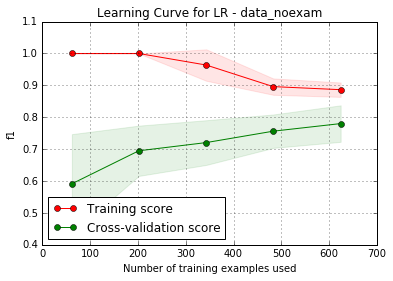

In [102]:
draw_learning_curve(best_lr1, X_train_std1, y_train1, estimator_titles=['Learning Curve for LR - data_noexam'], 
                    cv=cv2, scoring='f1')
plt.title('Learning Curve for LR - data_noexam');

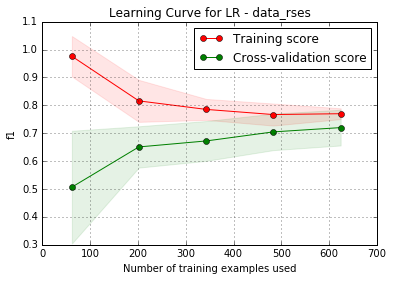

In [103]:
draw_learning_curve(best_lr4, X_train_std4, y_train4, estimator_titles=['Learning Curve for LR - data_rses'], 
                    cv=cv2, scoring='f1')
plt.title('Learning Curve for LR - data_rses');

In [143]:
# farther from zero --> more important
# data_noexam
pd.DataFrame({'features': X_train1.columns, 'coefficients': best_lr1.coef_[0]}).sort_values(by='coefficients', ascending=False)

,coefficients,features
18,1.537,student_attendance_rate
5,1.322,grade8_math
27,0.997,grade8_proficiency
24,0.927,violation_offenses
9,0.917,ell_percent
17,0.914,sat_percent_took_exam
25,0.685,school_day_length
2,0.590,poverty_percent
6,0.520,enrollment
12,0.496,disability_percent


In [105]:
# farther from zero --> more important
# data_rses
pd.DataFrame({'features': X_train4.columns, 'coefficients': best_lr4.coef_[0]})

,coefficients,features
0,-0.086181,female_percent
1,0.060963,male_percent
2,-0.129189,poverty_percent
3,0.119394,avg_home_value_sqft
4,0.484080,asian_percent
5,-1.030009,black_percent
6,-1.526021,ell_percent
7,-0.623306,hispanic_percent
8,-1.281524,self-contained_percent
9,-1.579741,disability_percent


#### SVM

In [106]:
# import and create svm
#from sklearn.svm import SVC
#svm = SVC()

In [107]:
# data_noexam
#parameters_svm = {'C': np.linspace(.001, 10, 10), 'kernel': ['poly', 'rbf'],
#         'degree': range(1,4), 'gamma': np.linspace(.001, 10, 10)}
#clfsvm1 = GridSearchCV(svm, parameters_svm, cv=cv1, n_jobs=-1)
#clfsvm1.fit(X_train1, y_train1)

In [108]:
#clfsvm4 = GridSearchCV(svm, parameters_svm, cv=cv4, n_jobs=-1)
#clfsvm4.fit(X_train4, y_train4)

In [109]:
#clfsvm1.best_params_

In [110]:
#best_svm4 = clfsvm4.best_estimator_

In [111]:
#best_svm1.score(X_test1, y_test1)

In [112]:
# Precision / Recall / F1 - data

#print classification_report(best_svm1.predict(X_test1), y_test1)

In [113]:
#best_svm4.score(X_test4, y_test4)

In [114]:
# Precision / Recall / F1 - data
#
#print classification_report(best_svm4.predict(X_test4), y_test4)

In [115]:
#%timeit best_svm1.predict(X_test1)

In [116]:
#%timeit best_svm4.predict(X_test4)

In [117]:
# not sure if this really illustrates what is happening above -- can we use learning curves for svm?
#draw_learning_curve(best_svm4, X_train_std4, y_train4, estimator_titles=['Learning Curve for SVM - data_rses'], 
#                    cv=cv4, scoring='f1')
#plt.title('Learning Curve for SVM - data_rses');

#### k-means

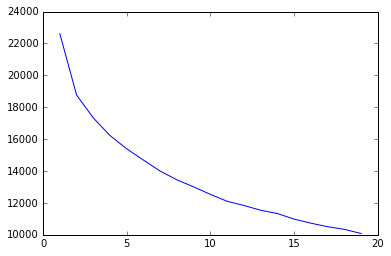

In [118]:
from sklearn.cluster import KMeans

# look at inertia plot (how close together are the points in the clusters) -- no_noexam
x11 = []
y11 = []
for n in range(1,20):
    km11 = KMeans(n_clusters=n)
    km11.fit(X_train_std1)
    x11.append(n)
    y11.append(km11.inertia_)
plt.plot(x11, y11);

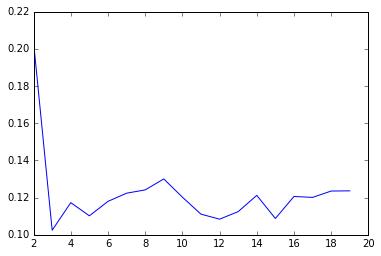

In [119]:
from sklearn.metrics import silhouette_score

# look at silhouette plot (density and separation of each cluster) -- data_noexam
x11 = []
y11 = []
for n in range(2,20):
    km11 = KMeans(n_clusters=n)
    centers = km11.fit_predict(X_train_std1)
    x11.append(n)
    y11.append(silhouette_score(X_train_std1, centers))
plt.plot(x11, y11);

In [120]:
%%timeit
# I'm going to choose k=4
km1 = KMeans(n_clusters=4, n_init=20)
cluster_labels1 = km1.fit_predict(X_train_std1)

1 loops, best of 3: 231 ms per loop


In [121]:
km1 = KMeans(n_clusters=4, n_init=20)
cluster_labels1 = km1.fit_predict(X_train_std1)

In [122]:
print 'DATA_IMPUTED:\nInertia score: {} \nSilhouette score: {}'.format(km1.inertia_, silhouette_score(X_train_std1, cluster_labels1))

DATA_IMPUTED:
Inertia score: 16223.9644815 
Silhouette score: 0.115786576724


In [123]:
# check cluster centers for each cluster -- for data_noexam 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
columns = {str(x): scale1.inverse_transform(km1.cluster_centers_[x]) for x in range(0,len(km1.cluster_centers_))}
pd.DataFrame(columns, index=X_train1.columns)

,0,1,2,3
female_percent,0.472,0.435,0.531,0.532
male_percent,0.528,0.565,0.469,0.468
poverty_percent,0.946,0.867,0.822,0.531
avg_home_value_sqft,420.117,385.978,515.952,583.631
grade8_english,1.845,2.219,2.469,3.128
grade8_math,2.112,2.100,2.375,3.054
enrollment,385.818,481.699,599.564,1473.037
asian_percent,0.171,0.033,0.079,0.282
black_percent,0.083,0.477,0.396,0.127
ell_percent,0.819,0.117,0.070,0.031


In [142]:
# Check cluster sizes
cluster_sizes = pd.DataFrame(data=[y_train1, cluster_labels1])
cluster_sizes

DBN,1419K404,1512X684,1409X329,1510X342,1428Q470,1502M551,1407X527,1519K502,1524Q560,1511X418,...,1484M888,1424Q455,1409X276,1412X278,1429Q283,1416K393,1503M415,1429Q492,1513K439,1502M425
label,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
Unnamed 0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [125]:
cluster_sizes = cluster_sizes.transpose()

In [126]:
cluster_sizes.head()

,label,Unnamed 0
DBN,,
1419K404,0.000,nan
1512X684,0.000,nan
1409X329,0.000,nan
1510X342,0.000,nan
1428Q470,0.000,nan


In [127]:
cluster_sizes['label'] = cluster_sizes['label'].astype(int)

In [128]:
cluster_sizes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 1419K404 to 1502M425
Data columns (total 2 columns):
label        780 non-null int64
Unnamed 0    0 non-null float64
dtypes: float64(1), int64(1)
memory usage: 18.3+ KB


In [130]:
X_kmtrain11 = X_train1.copy()
X_kmtrain11 = pd.DataFrame(scale1.fit_transform(X_kmtrain11))
X_kmtrain11['cluster'] = km1.labels_
X_kmtrain11.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,cluster
0,1.352,-1.352,-0.084,-0.686,0.385,-0.440,-0.311,-0.594,1.311,-0.564,...,-0.409,-0.276,0.228,3.921,2.782,-0.055,0.427,-0.034,3.702,1
1,-0.866,0.866,0.304,-0.258,-0.645,-0.623,-0.209,-0.622,0.828,-0.483,...,-0.873,-0.943,-0.070,-0.897,-1.489,-0.055,-0.115,-0.646,-1.184,1
2,0.834,-0.834,1.222,-0.909,-0.594,-0.770,-0.412,-0.596,-0.219,0.603,...,-1.431,-0.769,2.907,1.048,1.260,-0.920,0.084,-0.696,1.194,1
3,-0.082,0.082,1.031,-0.258,-1.268,-0.648,-0.131,-0.679,-1.448,2.920,...,0.892,-0.450,0.089,0.786,0.722,1.503,2.904,-0.972,0.807,0
4,-0.001,0.001,0.146,-0.258,-0.839,-0.506,-0.793,1.802,-0.102,0.771,...,-2.174,-0.740,5.402,-0.113,-0.134,-0.055,-1.316,-0.683,-0.128,1


In [131]:
# add cluster labels to test set; make sure it is standardized and in a dataframe
X_kmtest11 = X_test1.copy()
X_kmtest11 = pd.DataFrame(scale1.fit_transform(X_kmtest11))
X_kmtest11['cluster'] = km1.predict(X_test_std1)
X_kmtest11.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,cluster
0,-1.375,1.375,-0.766,-0.666,-0.154,-0.470,0.113,-0.223,-0.180,-0.536,...,-0.765,0.578,0.018,0.032,2.478,-0.109,-1.322,-0.317,0.980,1
1,-0.119,0.119,1.291,-0.336,-0.709,-0.775,-0.129,-0.638,-0.312,-0.175,...,1.722,1.996,0.854,-0.390,0.084,-2.397,0.295,-0.757,-0.229,1
2,-1.407,1.407,-2.652,-0.336,0.450,-0.218,-0.671,0.065,-0.682,-0.540,...,1.531,-0.058,-0.156,-0.726,-1.255,-0.491,-1.400,0.120,-0.972,2
3,1.033,-1.033,0.163,3.741,-0.055,-0.279,-0.692,-0.567,-0.378,-0.432,...,1.627,0.578,-0.745,0.763,-0.552,-0.109,-0.142,-0.170,0.298,2
4,-0.076,0.076,0.335,-0.336,-0.447,-0.646,0.054,-0.585,0.335,0.230,...,0.287,0.405,2.156,-0.047,0.128,1.035,-0.321,-0.557,0.018,1


In [133]:
clfrf1.fit(X_kmtrain11, y_train1)
clfrf1.best_params_

{'n_estimators': 46}

In [134]:
clfrf1.best_score_

0.95448717948717954

In [135]:
best_rf1 = clfrf1.best_estimator_

In [139]:
scores1 = cross_val_score(rfmodel, X_kmtrain11, y_train1, scoring='f1')
print('CV accuracy {}, Average accuracy {}'.format(scores1, scores1.mean()))

CV accuracy [ 0.75        0.86486486  0.84375   ], Average accuracy 0.819538288288


In [140]:
best_rf1.score(X_kmtest11, y_test1)

0.96410256410256412

In [141]:
predrf1 = clfrf1.predict(X_kmtest11)
precision_recall_fscore_support(predrf1, y_test1, average='binary') 

(0.86363636363636365, 0.82608695652173914, 0.84444444444444444, None)